# Winter School 2024

In this exercise, you will investigate the delSEAR/enlSEAR dataset consisting of descriptions of emotional events.

Please refer to the following papers for details of the dataset:
- Troiano, Enrica, Sebastian Padó, and Roman Klinger. "Crowdsourcing and Validating Event-focused Emotion Corpora for German and English." Proceedings of the 57th Annual Meeting of the Association for Computational Linguistics. 2019. [Link](https://aclanthology.org/P19-1391/)
- Hofmann, Jan, et al. "Appraisal Theories for Emotion Classification in Text." Proceedings of the 28th International Conference on Computational Linguistics. 2020. [Link](https://aclanthology.org/2020.coling-main.11/)

### Preparation

Setup a new virtual environment and install required packages.

In [26]:
!python -m venv env_exercise_I

In [27]:
!source env_exercise_I/bin/activate

In [28]:
!pip install -r requirements.txt

### 1. Retrieve and load the data set

In [4]:
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile
from pathlib import Path
from typing import Optional

def download_and_unzip(url: str, extract_to: Optional[Path] = None):
    if not extract_to:
        extract_to = Path(".")

    http_response = urlopen(url)
    zipfile = ZipFile(BytesIO(http_response.read()))
    zipfile.extractall(path=extract_to)

data_directory = Path("data")
data_directory.mkdir(parents=True, exist_ok=True)

DATASET_URL = "https://www.romanklinger.de/data-sets/deISEARenISEAR.zip"
download_and_unzip(DATASET_URL, data_directory)

APPRAISAL_DATA_URL = "https://www.romanklinger.de/data-sets/appraisalEnISEAR.zip"
download_and_unzip(APPRAISAL_DATA_URL, data_directory)

In [5]:
import pandas as pd

EMOTION_FILE = Path("data/deISEARenISEAR/enISEAR.tsv")

# TODO: Load emotion data from EMOTION_FILE using Sentence_id as id
emotion_data = pd.read_csv(EMOTION_FILE, sep="\t", index_col="Sentence_id")

In [6]:
# Inspect the 10 first instances in the data set
emotion_data.head(10)

,Prior_Emotion,Sentence,Temporal_Distance,Intensity,Duration,Gender,City,Country,Worker_id,Time,Anger,Disgust,Fear,Guilt,Joy,Sadness,Shame
Sentence_id,,,,,,,,,,,,,,,,,
271,Fear,"I felt ... when my 2 year old broke her leg, a...",Y,Vi,Dom,Ml,Bristol,GBR,87,11/28/2018 00:58:52,0,0,0,1,0,3,1
597,Shame,I felt ... one Christmas as one of our patient...,Y,I,Dom,Fl,Dulwich,GBR,86,11/26/2018 06:52:02,1,0,0,4,0,0,0
282,Guilt,I felt ... because I could not help a friend w...,M,Mi,Dom,Fl,Linlithgow,GBR,83,11/21/2018 18:45:00,0,0,0,4,0,1,0
171,Disgust,I felt ... when I read that hunters had killed...,Y,Mi,H,Ml,Bristol,GBR,87,11/28/2018 00:55:11,3,0,0,0,0,2,0
509,Sadness,I felt ... when my Gran passed away.,Y,Vi,Dom,Fl,Stoke-on-trent,GBR,92,11/26/2018 09:23:38,0,0,0,0,0,5,0
181,Disgust,I felt ... when I stepped in dog shit on the w...,M,I,H,Fl,Shepherds Bush,GBR,90,11/28/2018 21:42:00,0,5,0,0,0,0,0
218,Fear,I felt ... when an aeroplane I was on hit a he...,Y,Vi,Sh,Ml,Prescot,GBR,63,11/24/2018 09:14:44,0,0,5,0,0,0,0
642,Shame,I felt ... when my daughter was rude to my wife.,D,N,Fm,Ml,Chelmsford,GBR,91,11/26/2018 23:35:24,3,0,0,0,0,2,0
553,Sadness,I felt ... when my lover Pierre-Guillaume left...,M,Vi,Dom,Fl,NaN,GBR,105,11/28/2018 09:31:20,4,0,0,0,0,1,0


In [7]:
# Load the appraisal data
APPRAISAL_FILE = Path("data/emotion_appraisal_corpus.tsv")

# TODO: Load appraisal data from APPRAISAL_FILE using Sentence_id as id
appraisal_data = pd.read_csv(APPRAISAL_FILE, sep="\t", index_col="Sentence_id")

In [8]:
# Inspect the first 10 instances
appraisal_data.head(10)

,Prior_Emotion,Sentence,Attention,Certainty,Effort,Pleasant,Responsibility,Control,Circumstance
Sentence_id,,,,,,,,,
271,Fear,"I felt ... when my 2 year old broke her leg, a...",3,1,3,0,0,1,1
597,Shame,I felt ... one Christmas as one of our patient...,3,3,1,0,2,0,0
282,Guilt,I felt ... because I could not help a friend w...,1,3,0,0,3,2,1
171,Disgust,I felt ... when I read that hunters had killed...,2,3,0,0,0,0,0
509,Sadness,I felt ... when my Gran passed away.,2,2,2,0,0,0,3
181,Disgust,I felt ... when I stepped in dog shit on the w...,2,3,2,0,2,1,2
218,Fear,I felt ... when an aeroplane I was on hit a he...,1,0,3,0,0,0,3
642,Shame,I felt ... when my daughter was rude to my wife.,2,2,1,0,0,0,0
553,Sadness,I felt ... when my lover Pierre-Guillaume left...,2,2,2,0,1,0,0


In [9]:
# Join both information sources
data = emotion_data.join(appraisal_data, rsuffix="_app")

# Remove duplicate columns
data.drop(["Prior_Emotion_app", "Sentence_app"], axis=1, inplace=True)

In [10]:
data.head(10)

,Prior_Emotion,Sentence,Temporal_Distance,Intensity,Duration,Gender,City,Country,Worker_id,Time,...,Joy,Sadness,Shame,Attention,Certainty,Effort,Pleasant,Responsibility,Control,Circumstance
Sentence_id,,,,,,,,,,,,,,,,,,,,,
271,Fear,"I felt ... when my 2 year old broke her leg, a...",Y,Vi,Dom,Ml,Bristol,GBR,87,11/28/2018 00:58:52,...,0,3,1,3,1,3,0,0,1,1
597,Shame,I felt ... one Christmas as one of our patient...,Y,I,Dom,Fl,Dulwich,GBR,86,11/26/2018 06:52:02,...,0,0,0,3,3,1,0,2,0,0
282,Guilt,I felt ... because I could not help a friend w...,M,Mi,Dom,Fl,Linlithgow,GBR,83,11/21/2018 18:45:00,...,0,1,0,1,3,0,0,3,2,1
171,Disgust,I felt ... when I read that hunters had killed...,Y,Mi,H,Ml,Bristol,GBR,87,11/28/2018 00:55:11,...,0,2,0,2,3,0,0,0,0,0
509,Sadness,I felt ... when my Gran passed away.,Y,Vi,Dom,Fl,Stoke-on-trent,GBR,92,11/26/2018 09:23:38,...,0,5,0,2,2,2,0,0,0,3
181,Disgust,I felt ... when I stepped in dog shit on the w...,M,I,H,Fl,Shepherds Bush,GBR,90,11/28/2018 21:42:00,...,0,0,0,2,3,2,0,2,1,2
218,Fear,I felt ... when an aeroplane I was on hit a he...,Y,Vi,Sh,Ml,Prescot,GBR,63,11/24/2018 09:14:44,...,0,0,0,1,0,3,0,0,0,3
642,Shame,I felt ... when my daughter was rude to my wife.,D,N,Fm,Ml,Chelmsford,GBR,91,11/26/2018 23:35:24,...,0,2,0,2,2,1,0,0,0,0
553,Sadness,I felt ... when my lover Pierre-Guillaume left...,M,Vi,Dom,Fl,NaN,GBR,105,11/28/2018 09:31:20,...,0,1,0,2,2,2,0,1,0,0


### 2. Perform initial data set analysis

First inspect basic properties of the dataset and the provided texts (e.g. check for duplicates, missing values, anomalies, etc.)

In [11]:
# TODO: print / inspect the distribution of the different emotions, i.e. the values in Prior_Emotion
data["Prior_Emotion"].value_counts(normalize=True)

Prior_Emotion
Fear       0.142857
Shame      0.142857
Guilt      0.142857
Disgust    0.142857
Sadness    0.142857
Anger      0.142857
Joy        0.142857
Name: proportion, dtype: float64

In [12]:
# TODO: print / inspect the value distribution of the temporal distance feature
data["Temporal_Distance"].value_counts(normalize=True)

Temporal_Distance
Y    0.386613
D    0.246753
M    0.189810
W    0.176823
Name: proportion, dtype: float64

/home/mario/anaconda3/envs/winterschool/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Temporal_Distance', ylabel='Count'>

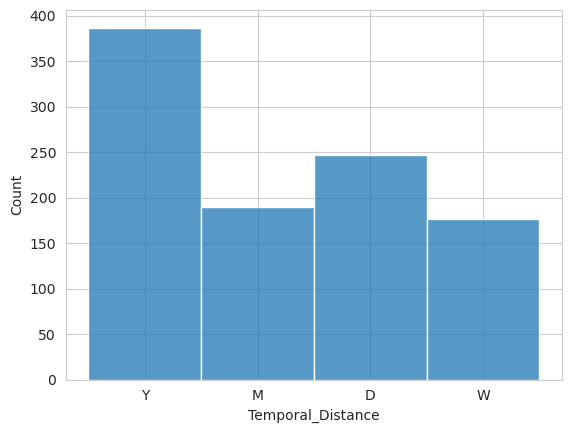

In [13]:
import seaborn as sns

# TODO: Plot a histogram of the values in temporal distance
sns.histplot(data, x="Temporal_Distance")

In [14]:
# TODO: Print / inspect / plot the value distribution in the column Intensity and Duration
data["Intensity"].value_counts(normalize=True)

Intensity
Vi    0.321678
I     0.312687
Mi    0.289710
N     0.075924
Name: proportion, dtype: float64

In [15]:
data["Duration"].value_counts(normalize=True)

Duration
Dom    0.361638
Fm     0.233766
Sh     0.227772
H      0.176823
Name: proportion, dtype: float64

In [16]:
data["Gender"].value_counts(normalize=True)

Gender
Fl    0.577423
Ml    0.422577
Name: proportion, dtype: float64

In [17]:
# Split the texts into single words
import nltk
data["words"] = data["Sentence"].apply(lambda text: nltk.word_tokenize(text))
data["words"].head(10)

# Compute text lengths
data["sentence_length"] = data["words"].apply(lambda words: len(words))

<Axes: ylabel='sentence_length'>

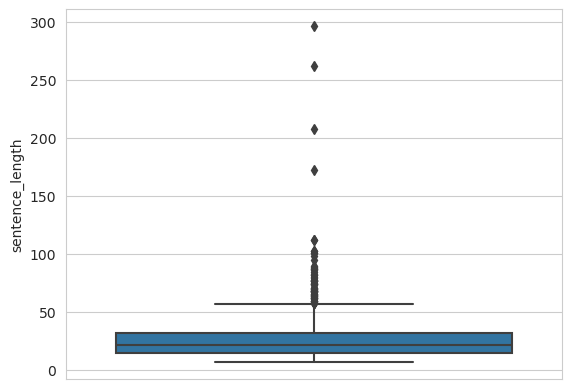

In [18]:
# TODO: Create a boxplot of the text lengths
sns.boxplot(data, y="sentence_length")

/home/mario/anaconda3/envs/winterschool/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sentence_length', ylabel='Count'>

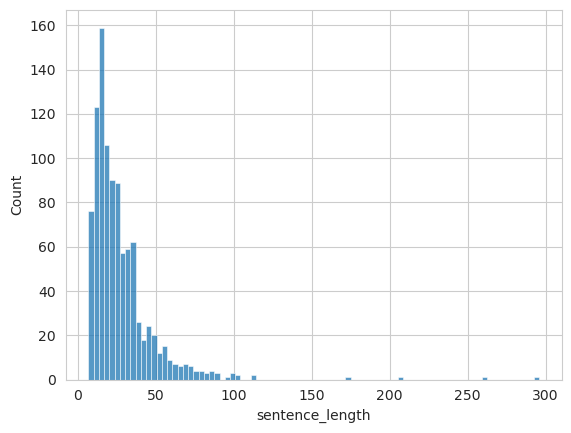

In [19]:
# ... or alternatively use a histogram
sns.histplot(data, x="sentence_length")

In [20]:
# TODO: Print / inspect the instances with the 10% of the longest sentences
data[data["sentence_length"] >= data["sentence_length"].quantile(0.9)]

,Prior_Emotion,Sentence,Temporal_Distance,Intensity,Duration,Gender,City,Country,Worker_id,Time,...,Shame,Attention,Certainty,Effort,Pleasant,Responsibility,Control,Circumstance,words,sentence_length
Sentence_id,,,,,,,,,,,,,,,,,,,,,
597,Shame,I felt ... one Christmas as one of our patient...,Y,I,Dom,Fl,Dulwich,GBR,86,11/26/2018 06:52:02,...,0,3,3,1,0,2,0,0,"[I, felt, ..., one, Christmas, as, one, of, ou...",103
381,Joy,I felt ... because my son was picked as the ou...,M,Vi,Dom,Fl,Earith,GBR,62,11/23/2018 19:13:46,...,0,2,3,1,3,0,0,1,"[I, felt, ..., because, my, son, was, picked, ...",51
412,Joy,I felt ... when I was a young girl because we ...,Y,I,Dom,Fl,Walsall,GBR,108,11/27/2018 01:25:43,...,0,2,2,1,3,0,1,1,"[I, felt, ..., when, I, was, a, young, girl, b...",101
91,Disgust,I felt ... when my cat woke me up by vomiting ...,W,I,Sh,Fl,Crewe,GBR,89,11/21/2018 23:25:19,...,0,2,2,3,0,0,0,2,"[I, felt, ..., when, my, cat, woke, me, up, by...",52
327,Guilt,I felt ... when my aunt died as I hadn’t seen ...,M,Vi,Dom,Fl,Cheltenham,GBR,73,11/26/2018 06:24:05,...,0,3,2,2,0,2,1,2,"[I, felt, ..., when, my, aunt, died, as, I, ha...",53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Joy,I felt ... because I was offered a promotion a...,M,Mi,Dom,Fl,Birmingham,GBR,121,1/2/2019 18:20:29,...,0,3,3,0,3,2,0,1,"[I, felt, ..., because, I, was, offered, a, pr...",50
782,Disgust,I feel … when I read in the news several times...,D,Vi,Sh,Ml,Eastbourne,GBR,103,1/8/2019 07:29:03,...,0,2,3,1,0,0,0,0,"[I, feel, …, when, I, read, in, the, news, sev...",78
569,Shame,"I felt ... at Halloween time many years ago, m...",Y,N,Fm,Ml,Claremorris,IRL,118,11/23/2018 10:36:35,...,3,1,3,1,0,1,3,0,"[I, felt, ..., at, Halloween, time, many, year...",98


<Axes: xlabel='Prior_Emotion', ylabel='sentence_length'>

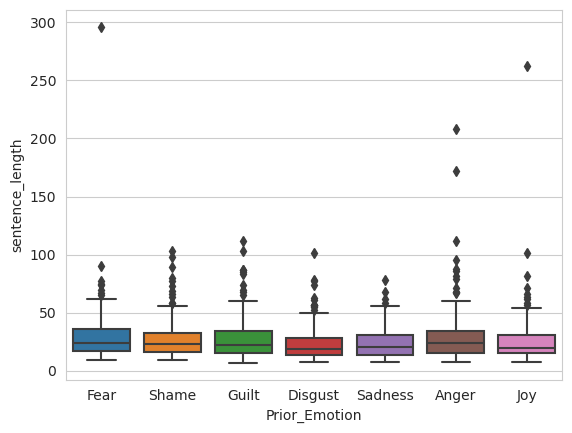

In [22]:
# TODO: Create a boxplot highlighting the sentence lengths per emotion (i.e. Prior_Emotion)
sns.boxplot(data, y="sentence_length", x="Prior_Emotion")

<Axes: xlabel='Prior_Emotion', ylabel='sentence_length'>

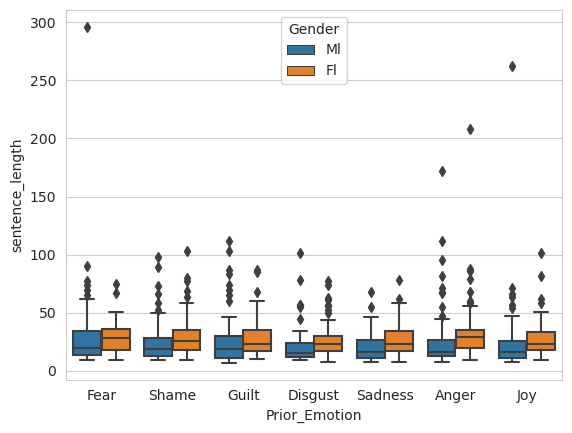

In [23]:
# TODO: Create a boxplot highlighting the sentence lengths per emotion (i.e. Prior_Emotion) and gender
sns.boxplot(data, y="sentence_length", hue="Gender", x="Prior_Emotion")


## Create a train, validation, test split

In [24]:
from sklearn.model_selection import train_test_split

SEED = 907

TEST_SIZE = 0.2
VALIDATION_SIZE = 0.2

# TODO: Split the data set into a train, a validation and a test split
# The validation and test split should each comprise 20% of the instances of the original corpus
train, test = train_test_split(
    data,
    test_size=TEST_SIZE,
    stratify=data["Prior_Emotion"],
    random_state=SEED
)

train, validation = train_test_split(
    train,
    test_size=int(len(data) *  VALIDATION_SIZE),
    stratify=train["Prior_Emotion"],
    random_state=SEED
)

In [25]:
train["Prior_Emotion"].value_counts()


Prior_Emotion
Sadness    86
Guilt      86
Fear       86
Shame      86
Disgust    86
Anger      85
Joy        85
Name: count, dtype: int64